In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df_ddos = pd.read_csv('ddos_traffic_model_ready.csv')

In [3]:
df_normal = pd.read_csv('normal_traffic_model_ready.csv')

## Columns Selection

In [4]:
df_final = pd.concat([df_ddos, df_normal])
df_final = df_final.sample(frac=1)

In [5]:
X = df_final.drop(labels=['Address-A', 'Port-A', 'Address-B', 'Port-B', 'StreamID', 
                         'PerctageFiltered', 'CATEGORY', 'Relative_Start', 
                         'TotalPackets', 'Syn', 'Acknowledgment', 'Fin', 'Reset', 'Length', 'TCP Segment Len', 'Push',
                         'Bytes In Flight', 'Duration', 'Header Length'], axis=1)

y = df_final['CATEGORY']

### RandomForestNormal

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     n_jobs=-1).fit(X_train, y_train)

In [7]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6730
     GoldenEye       0.76      0.81      0.79      1321
          Hulk       0.77      0.87      0.82      2854
 Slow HTTP GET       1.00      1.00      1.00      3158
     Slow Post       0.90      0.74      0.81      1743
     Slow Read       0.56      0.26      0.36       325

      accuracy                           0.92     16131
     macro avg       0.83      0.78      0.79     16131
  weighted avg       0.92      0.92      0.92     16131



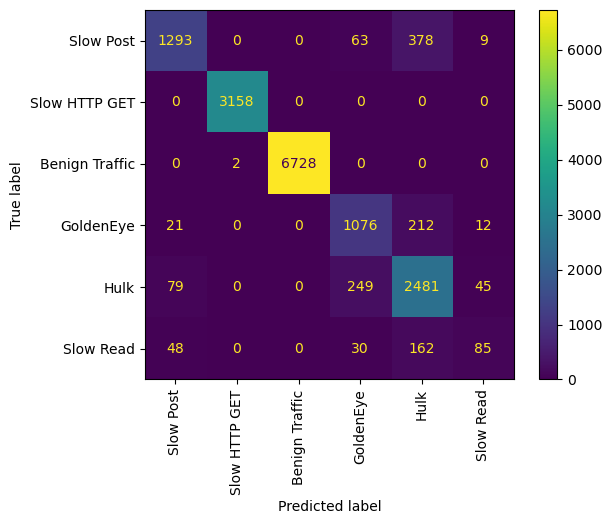

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, labels=df_final["CATEGORY"].unique(), xticks_rotation="vertical")

### Random Forest with class_weight = balanced

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     class_weight="balanced",
                                     n_jobs=-1).fit(X_train, y_train)

In [10]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6730
     GoldenEye       0.76      0.79      0.78      1321
          Hulk       0.77      0.88      0.82      2854
 Slow HTTP GET       1.00      1.00      1.00      3158
     Slow Post       0.91      0.75      0.82      1743
     Slow Read       0.59      0.31      0.40       325

      accuracy                           0.92     16131
     macro avg       0.84      0.79      0.80     16131
  weighted avg       0.92      0.92      0.92     16131



### Random Forest with class_weight = balanced_subsample

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     class_weight="balanced_subsample",
                                     n_jobs=-1).fit(X_train, y_train)

In [12]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6730
     GoldenEye       0.76      0.80      0.78      1321
          Hulk       0.76      0.87      0.82      2854
 Slow HTTP GET       1.00      1.00      1.00      3158
     Slow Post       0.90      0.74      0.82      1743
     Slow Read       0.59      0.30      0.40       325

      accuracy                           0.92     16131
     macro avg       0.84      0.79      0.80     16131
  weighted avg       0.92      0.92      0.92     16131



### Using imblearn BalancedRandomForestClassifier

In [13]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf = BalancedRandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=True,
                                     random_state=42,
                                     #class_weight="balanced_subsample",
                                     n_jobs=-1).fit(X_train, y_train)

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\imblearn\ensemble\_forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [15]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6730
     GoldenEye       0.71      0.90      0.79      1321
          Hulk       0.83      0.72      0.77      2854
 Slow HTTP GET       1.00      1.00      1.00      3158
     Slow Post       0.96      0.72      0.82      1743
     Slow Read       0.25      0.57      0.34       325

      accuracy                           0.90     16131
     macro avg       0.79      0.82      0.79     16131
  weighted avg       0.92      0.90      0.91     16131



In [17]:
# BalancedRandomForestClassifier with class weight = balanced

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf2 = BalancedRandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=True,
                                     random_state=42,
                                     class_weight="balanced",
                                     n_jobs=-1).fit(X_train, y_train)

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\imblearn\ensemble\_forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [18]:
y_pred_rf2 = rf2.predict(X_test)
print(classification_report(y_test, y_pred_rf2))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6730
     GoldenEye       0.73      0.89      0.80      1321
          Hulk       0.82      0.75      0.78      2854
 Slow HTTP GET       1.00      1.00      1.00      3158
     Slow Post       0.95      0.72      0.82      1743
     Slow Read       0.25      0.56      0.35       325

      accuracy                           0.91     16131
     macro avg       0.79      0.82      0.79     16131
  weighted avg       0.93      0.91      0.91     16131



In [19]:
# BalancedRandomForestClassifier with class weight = 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
rf3 = BalancedRandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=True,
                                     random_state=42,
                                     class_weight="balanced_subsample",
                                     n_jobs=-1).fit(X_train, y_train)

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\imblearn\ensemble\_forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [20]:
y_pred_rf3 = rf3.predict(X_test)
print(classification_report(y_test, y_pred_rf3))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6694
     GoldenEye       0.71      0.90      0.79      1283
          Hulk       0.83      0.73      0.77      2851
 Slow HTTP GET       1.00      1.00      1.00      3168
     Slow Post       0.95      0.71      0.82      1820
     Slow Read       0.23      0.56      0.33       315

      accuracy                           0.90     16131
     macro avg       0.79      0.82      0.79     16131
  weighted avg       0.93      0.90      0.91     16131



### Rough work

In [21]:
import request

ModuleNotFoundError: No module named 'request'